In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_n = pd.read_csv('neutralization.csv')



In [3]:
data_n.head(10)

,ID,V1,V2,V3,V4,V5,V6,Age,Sex,Type
0,5,NaN,94.829215,48.258947,35.058371,99.380952,99.383525,49,Female,HCW
1,17,60.117932,99.651612,96.247605,75.037476,99.408602,99.011329,51,Female,HCW
2,18,65.534265,99.404611,96.209486,75.324710,99.458292,97.269677,35,Male,HCW
3,27,45.132419,96.890865,56.874542,37.465156,98.532573,97.628147,38,Female,HCW
4,30,62.170257,95.857420,58.484909,52.574923,97.405882,90.931375,39,Male,HCW
5,38,78.801972,99.870687,65.238016,33.022550,98.421054,98.934647,47,Female,HCW
6,40,67.699160,99.765915,89.556023,70.067187,99.795254,97.314530,36,Female,HCW
7,41,73.263280,99.740696,97.022026,88.852069,NaN,99.756718,37,Male,HCW
8,45,54.732349,88.173670,53.165171,42.553175,93.310925,NaN,36,Male,HCW
9,46,32.473951,82.497934,59.015010,NaN,92.578891,79.692201,42,Female,HCW


In [4]:
#data_new1 = np.where(data_n['V2']<data_n['V3'], data_n['V3'],data_n['V2'])
#data_new2 = np.where(data_n['V2']<data_n['V3'], data_n['V2'],data_n['V3'])
#data_n['V2'] = data_new1
#data_n['V3'] = data_new2
#data_new3 = np.where(data_n['V3']<data_n['V4'], data_n['V4'],data_n['V3'])
#data_new4 = np.where(data_n['V3']<data_n['V4'], data_n['V3'],data_n['V4'])
#data_n['V3'] = data_new3
#data_n['V4'] = data_new4
#data_new5 = np.where(data_n['V5']<data_n['V6'], data_n['V6'],data_n['V5'])
#data_new6 = np.where(data_n['V5']<data_n['V6'], data_n['V5'],data_n['V6'])
#data_n['V5'] = data_new5
#data_n['V6'] = data_new6


In [5]:

#data_n.to_csv('Neutralization.csv', index=False)

In [6]:
hcw_a = pd.read_csv('hcw_monolix_age.csv')
senior_a = pd.read_csv('senior_monolix_age.csv')


In [7]:
hcw_a

,ID,Amount,Censoring,Age,Time,Result,Type,Sex
0,5,1.0,0,49,0,NaN,HCW,Female
1,5,1.0,0,49,60,NaN,HCW,Female
2,5,0.0,0,49,90,5655.0,HCW,Female
3,5,0.0,0,49,150,1390.0,HCW,Female
4,5,0.0,0,49,240,714.0,HCW,Female
...,...,...,...,...,...,...,...,...
284,124,0.0,0,43,150,9809.0,HCW,Female
285,124,0.0,0,43,240,3210.0,HCW,Female
286,124,0.5,0,43,270,NaN,HCW,Female
287,124,0.0,-1,43,300,25000.0,HCW,Female


In [8]:
hcw_a = hcw_a[['ID','Result','Time','Type','Age','Sex']]
hcw_a.insert(2,'Neutralization', 0)
hcw_a.insert(3,'logA', 0)
for i in range(len(hcw_a)):
    a = hcw_a['ID'].iloc[i]
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 30),'Neutralization']=data_n[(data_n['ID'] == a)]['V1'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 90),'Neutralization']=data_n[(data_n['ID'] == a)]['V2'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 150),'Neutralization']=data_n[(data_n['ID'] == a)]['V3'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 240),'Neutralization']=data_n[(data_n['ID'] == a)]['V4'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 300),'Neutralization']=data_n[(data_n['ID'] == a)]['V5'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 360),'Neutralization']=data_n[(data_n['ID'] == a)]['V6'].to_string(index=False)


In [9]:
hcw_a = hcw_a.dropna()

In [10]:
len(hcw_a['ID'].unique())

32

In [11]:
hcw_a = hcw_a[['ID','Result','Time','Type','Age','Sex']]
hcw_a.insert(2,'Neutralization', 0)
hcw_a.insert(3,'logA', 0)
for i in range(len(hcw_a)):
    a = hcw_a['ID'].iloc[i]
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 30),'Neutralization']=data_n[(data_n['ID'] == a)]['V1'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 90),'Neutralization']=data_n[(data_n['ID'] == a)]['V2'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 150),'Neutralization']=data_n[(data_n['ID'] == a)]['V3'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 240),'Neutralization']=data_n[(data_n['ID'] == a)]['V4'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 300),'Neutralization']=data_n[(data_n['ID'] == a)]['V5'].to_string(index=False)
    hcw_a.loc[(hcw_a['ID'] == a)&(hcw_a['Time'] == 360),'Neutralization']=data_n[(data_n['ID'] == a)]['V6'].to_string(index=False)


In [12]:
hcw_a.head(10)

,ID,Result,Neutralization,logA,Time,Type,Age,Sex
2,5,5655.0,94.829215,0,90,HCW,49,Female
3,5,1390.0,48.258947,0,150,HCW,49,Female
4,5,714.0,35.058371,0,240,HCW,49,Female
6,5,25000.0,99.380952,0,300,HCW,49,Female
7,5,15174.0,99.383525,0,360,HCW,49,Female
8,5,5492.0,0,0,450,HCW,49,Female
10,17,212.6,60.117932,0,30,HCW,51,Female
12,17,24079.0,99.651612,0,90,HCW,51,Female
13,17,8175.0,96.247605,0,150,HCW,51,Female
14,17,3799.0,75.037476,0,240,HCW,51,Female


In [13]:
hcw_a = hcw_a[hcw_a['Neutralization'].astype(float)>0]
hcw_a['Neutralization'] = hcw_a['Neutralization'].astype(float)/100
hcw_a['Result'] = hcw_a['Result'].astype(float)/1000
b = hcw_a['Result'].astype(float)
#hcw_a.loc[hcw_a['Result'].astype(float)== 25,'Time']=30
#hcw_a = hcw_a[hcw_a['Time'].astype(float)!=30]
# First, create a DataFrame with only the rows where Time is either 150 or 240
time_150_240 = hcw_a[hcw_a['Time'].isin([150, 240])]

# Find IDs where Neutralization at Time 240 is greater than at Time 150
ids_to_remove = time_150_240.pivot_table(index='ID', columns='Time', values='Neutralization').dropna()
ids_to_remove = ids_to_remove[ids_to_remove[240] > ids_to_remove[150]].index

# Filter out the rows with Time 240 for those IDs in the original DataFrame
hcw_a = hcw_a[~((hcw_a['ID'].isin(ids_to_remove)) & (hcw_a['Time'] == 240))]

hcw_a['logA'] = np.log10(b*1e3)
hcw_a.to_csv('hcw_AntiNeut_monolix_age_alldoses.csv', index=False)
hcw_a.head(10)

,ID,Result,Neutralization,logA,Time,Type,Age,Sex
2,5,5.6550,0.948292,3.752433,90,HCW,49,Female
3,5,1.3900,0.482589,3.143015,150,HCW,49,Female
4,5,0.7140,0.350584,2.853698,240,HCW,49,Female
6,5,25.0000,0.993810,4.397940,300,HCW,49,Female
7,5,15.1740,0.993835,4.181100,360,HCW,49,Female
10,17,0.2126,0.601179,2.327563,30,HCW,51,Female
12,17,24.0790,0.996516,4.381638,90,HCW,51,Female
13,17,8.1750,0.962476,3.912488,150,HCW,51,Female
14,17,3.7990,0.750375,3.579669,240,HCW,51,Female
16,17,25.0000,0.994086,4.397940,300,HCW,51,Female


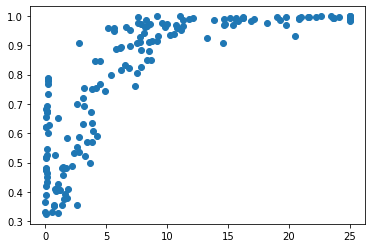

In [14]:
plt.scatter(hcw_a['Result'],hcw_a['Neutralization'])

In [15]:
senior_a = senior_a[['ID','Result','Time','Type','Age','Sex']]
senior_a.insert(2,'Neutralization', 0)
senior_a.insert(3,'logA', 0)
for i in range(len(senior_a)):
    a = senior_a['ID'].iloc[i]
    senior_a.loc[(senior_a['ID'] == a)&(senior_a['Time'] == 30),'Neutralization']=data_n[(data_n['ID'] == a)]['V1'].to_string(index=False)
    senior_a.loc[(senior_a['ID'] == a)&(senior_a['Time'] == 90),'Neutralization']=data_n[(data_n['ID'] == a)]['V2'].to_string(index=False)
    senior_a.loc[(senior_a['ID'] == a)&(senior_a['Time'] == 150),'Neutralization']=data_n[(data_n['ID'] == a)]['V3'].to_string(index=False)
    senior_a.loc[(senior_a['ID'] == a)&(senior_a['Time'] == 240),'Neutralization']=data_n[(data_n['ID'] == a)]['V4'].to_string(index=False)
    senior_a.loc[(senior_a['ID'] == a)&(senior_a['Time'] == 300),'Neutralization']=data_n[(data_n['ID'] == a)]['V5'].to_string(index=False)
    senior_a.loc[(senior_a['ID'] == a)&(senior_a['Time'] == 360),'Neutralization']=data_n[(data_n['ID'] == a)]['V6'].to_string(index=False)
senior_a = senior_a.dropna()
senior_a = senior_a[senior_a['Neutralization'].astype(float)>0]
senior_a['Neutralization'] = senior_a['Neutralization'].astype(float)/100
senior_a['Result'] = senior_a['Result'].astype(float)/1000
b = senior_a['Result'].astype(float)
#senior_a.loc[senior_a['Result'].astype(float)== 25,'Time']=30
#senior_a = senior_a[senior_a['Time'].astype(float)!=30]

# First, create a DataFrame with only the rows where Time is either 150 or 240
time_150_240 = senior_a[senior_a['Time'].isin([150, 240])]

# Find IDs where Neutralization at Time 240 is greater than at Time 150
ids_to_remove = time_150_240.pivot_table(index='ID', columns='Time', values='Neutralization').dropna()
ids_to_remove = ids_to_remove[ids_to_remove[240] > ids_to_remove[150]].index

# Filter out the rows with Time 240 for those IDs in the original DataFrame
senior_a = senior_a[~((senior_a['ID'].isin(ids_to_remove)) & (senior_a['Time'] == 240))]

senior_a['logA'] = np.log10(b*1e3)
senior_a.to_csv('senior_antiNeut_monolix_age_alldoses.csv', index=False)
senior_a.head(10)

,ID,Result,Neutralization,logA,Time,Type,Age,Sex
1,91,0.00381,0.538046,0.580925,30,SENIOR,83,Female
3,91,4.40900,0.876961,3.644340,90,SENIOR,83,Female
4,91,2.09300,0.549400,3.320769,150,SENIOR,83,Female
7,91,25.00000,0.998019,4.397940,300,SENIOR,83,Female
8,91,17.49800,0.995704,4.242988,360,SENIOR,83,Female
11,92,0.11050,0.531812,2.043362,30,SENIOR,83,Male
13,92,9.98600,0.846043,3.999392,90,SENIOR,83,Male
14,92,3.21400,0.349833,3.507046,150,SENIOR,83,Male
15,92,1.01900,0.204258,3.008174,240,SENIOR,83,Male
17,92,25.00000,0.961380,4.397940,300,SENIOR,83,Male


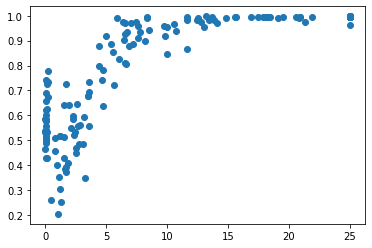

In [16]:

plt.scatter(senior_a['Result'],senior_a['Neutralization'])

In [17]:

senior_mean_values = senior_a.groupby('Time')[['Neutralization', 'Result']].mean().reset_index()
senior_mean_values['ID'] = 2
senior_mean_values.to_csv('senior_AntiNeut_monolix_average_alldoses.csv', index=False)



hcw_mean_values = hcw_a.groupby('Time')[['Neutralization', 'Result']].mean().reset_index()
hcw_mean_values['ID'] = 1
hcw_mean_values.to_csv('hcw_AntiNeut_monolix_average_alldoses.csv', index=False)

all_a = pd.concat([senior_a, hcw_a], ignore_index=True)
all_a.to_csv('all_antiNeut_monolix_age_alldoses.csv', index=False)